# Heart Attack Analysis & Prediction Dataset
## A dataset for heart attack classification

### About this dataset
* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic

* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* thalach : maximum heart rate achieved
* output : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evalution
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load Data


In [2]:
data = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

# Deep Copy
df = data.copy()

# Data Exploration

In [3]:

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

## Heart Disease frequency according to Sex

In [8]:
pd.crosstab(df.sex, df.output)

output,0,1
sex,,
0,24,72
1,114,93


Text(0.5, 0, '0 = Not Disease, 1 = Disease')

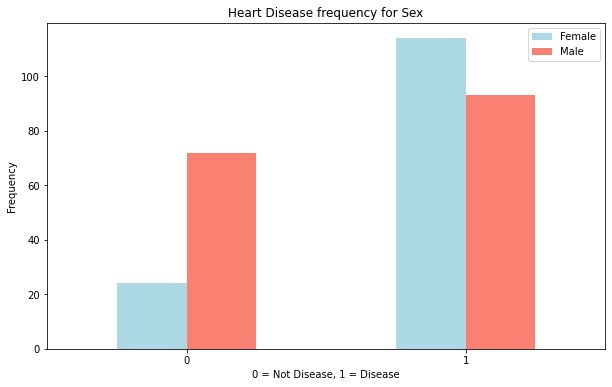

In [9]:
pd.crosstab(df.sex, df.output).plot(kind='bar', figsize=(10, 6), color=['lightblue', 'salmon'])

plt.title('Heart Disease frequency for Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male'])
plt.xlabel('0 = Not Disease, 1 = Disease')

## Age vs Max Heart Rate for Heart Disease

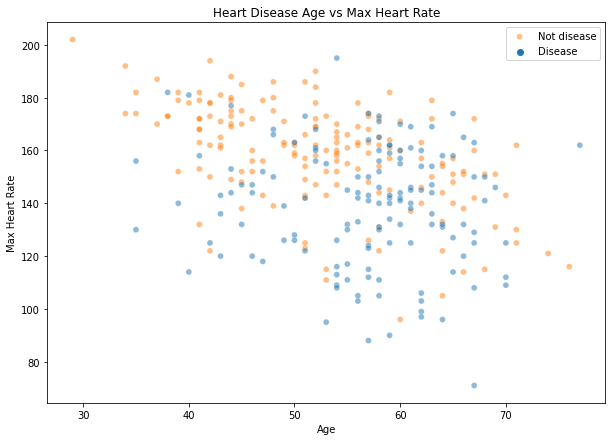

In [10]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df.age, y=df.thalachh, hue=df.output, alpha=0.5)
plt.title('Heart Disease Age vs Max Heart Rate')
plt.ylabel('Max Heart Rate')
plt.xlabel('Age')
plt.legend(['Not disease', 'Disease'])

## Heart Desease Frequency per Chest Pain Type

* cp : Chest Pain type chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

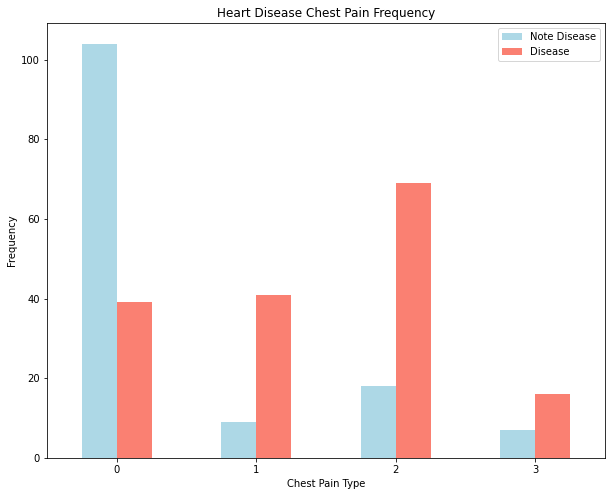

In [11]:
pd.crosstab(df.cp, df.output).plot(kind='bar', figsize=(10,8), color=['lightblue', 'salmon'])
plt.ylabel('Frequency')
plt.xlabel('Chest Pain Type')
plt.title('Heart Disease Chest Pain Frequency')
plt.legend(['Note Disease', 'Disease'])
plt.xticks(rotation=0)

In [12]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

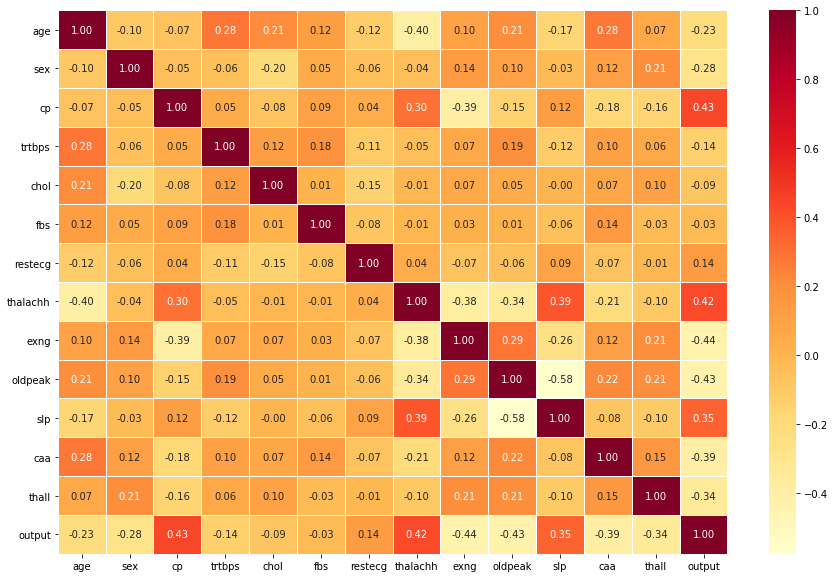

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', cmap='YlOrRd', linewidths=0.5)

In [15]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Modelling

In [16]:
# Split Data
x = df.drop(columns=['output'])

y = df['output']

In [17]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [19]:
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Model selection

In [21]:
model_selection = {'Logistic Regression': LogisticRegression(),
                   'K Neighbors Classifier': KNeighborsClassifier(),
                   'Random Forest Classifier': RandomForestClassifier()}

def fit_and_score(x_train, x_test, y_train, y_test):
    # Make empty Score dic
    score = {}
    # Model fit
    for name, model in model_selection.items():
        # Fit the data in to model
        model.fit(x_train, y_train)
        # save the score 
        score[name] = model.score(x_test, y_test)
    return score

In [22]:
model_scores = fit_and_score(x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

model_scores

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'K Neighbors Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8524590163934426}

<AxesSubplot:>

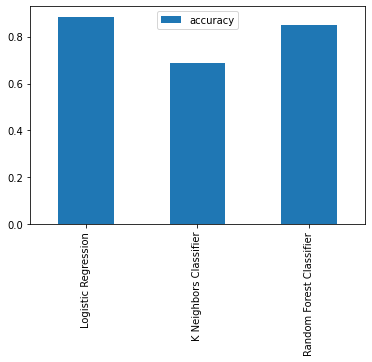

In [23]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.T.plot(kind='bar')

# For improve accuracy following steps :
* Hypyterparameter tuning
* feature importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

### HyperParameters Tuning (by hand)

In [24]:
# KNN tune
train_score = []
test_score = []

# Create a list of different values for K-Neighbors
neighbors = range(1, 21)

# Setup KNN instant
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # update training score list
    train_score.append(knn.score(x_train, y_train))
    
    # update test score list
    test_score.append(knn.score(x_test, y_test))
    

In [25]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [26]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data:75.41%


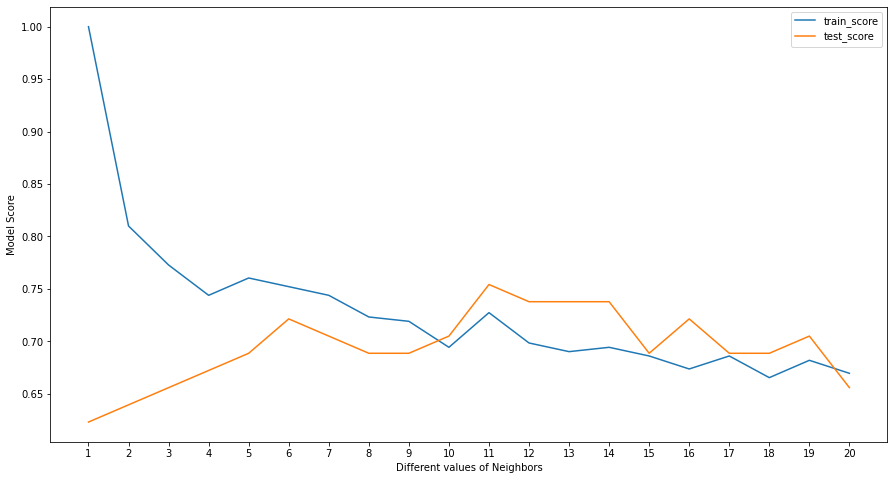

In [27]:
plt.figure(figsize=(15, 8))

sns.lineplot(x=neighbors, y=train_score)
sns.lineplot(x=neighbors, y=test_score)
plt.xticks(np.arange(1,21))
plt.xlabel('Different values of Neighbors')
plt.ylabel('Model Score')
plt.legend(['train_score', 'test_score'])

print(f'Maximum KNN Score on the test data:{max(test_score)*100:.2f}%')

## Hyperparameter tunning with RandomizedSearchCV

Now tunning following:
* Logistic Regression()
* Random Forest Classifier()

... using RandomizedSearchCV

In [28]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

Now hyperparameter grids setup for each models ansd tune them using RandomizedSearchCV...

In [29]:
# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True, 
                                random_state=42)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   random_state=42, verbose=True)

In [30]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
# Evaluate the randomized search randomforestClassifier model
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now tuned LogisticRegression(), Let's do the same for RandomForestClassifer()...

In [32]:
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           random_state=42)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=42, verbose=True)

In [33]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [34]:
# Evaluate the randomized search randomforestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

LogisticRegression model provides the best scores so far,  therefore improve again using GridSearchCV...

In [35]:
# Diffrent hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

# setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [37]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* classification report
* Precision
* Recall
* F1-Score

....and it would be great it cross-validaton was used where possible

to make comaparistions and evaluate our trained model, first we need to make predictions.

In [38]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [39]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: output, Length: 61, dtype: int64

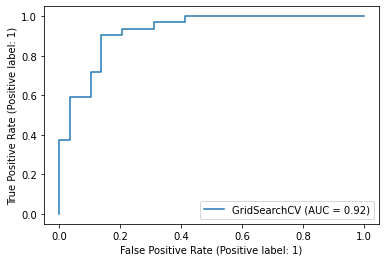

In [40]:
plot_roc_curve(gs_log_reg, x_test, y_test)

In [41]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]])

Text(6.0, 0.5, 'Predicted Value')

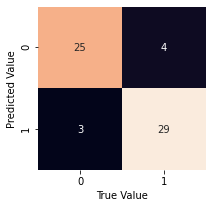

In [42]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [43]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

calculate accuracy, precision, recall and f1-score model using cross-validation and `cross_val_score()`.

In [44]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [46]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')

cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [47]:
# Cross-validated precision
cv_precision = cross_val_score(clf, x, y, cv=5, scoring='precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [48]:
# Cross-validated recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring='recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [49]:
# Cross-validated f1
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring='f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

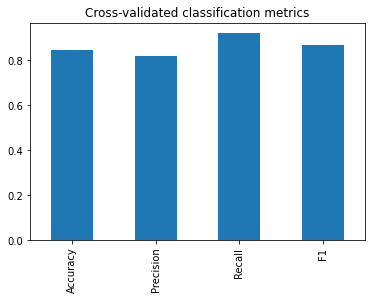

In [50]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics', legend=False)

In [51]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [52]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [53]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trtbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalachh': 0.02458922341328129,
 'exng': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slp': 0.4508539209693025,
 'caa': -0.6373332766360461,
 'thall': -0.6755509369619848}

<AxesSubplot:title={'center':'Feature Importance'}>

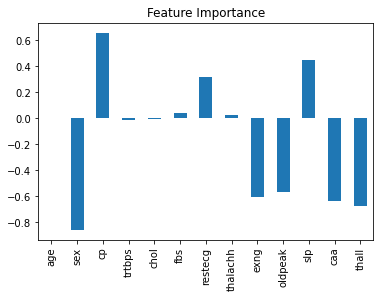

In [54]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

# Prediction

In [55]:
x_raw = df.drop(columns=['output'])
y_raw = df['output']

In [56]:
# Create Data Empty Dataframe
input_ = {'age':0, 'sex':0, 'cp':0, 'trtbps':0, 'chol':0, 'fbs':0, 'restecg':0, 'thalachh':0, 'exng':0, 'oldpeak':0, 
     'slp':0, 'caa':0, 'thall':0}
output = {'Logistic Regression': 0, 'K Neighbors Classifier': 0, 'Random Forest Classifier': 0}

# Create Data Empty Dataframe
final = {'age':0, 'sex':0, 'cp':0, 'trtbps':0, 'chol':0, 'fbs':0, 'restecg':0, 'thalachh':0, 'exng':0, 'oldpeak':0, 
     'slp':0, 'caa':0, 'thall':0, 'Logistic Regression': 0, 'K Neighbors Classifier': 0, 'Random Forest Classifier': 0}
data_final = pd.DataFrame(columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 
                                   'slp', 'caa', 'thall', 'Logistic Regression', 'K Neighbors Classifier', 
                                   'Random Forest Classifier'])


def input_data():
    # Make temporary dataframe
    temp = pd.DataFrame(columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 
                                   'oldpeak', 'slp', 'caa', 'thall'])
    
    # Make some intruction
    intruction = {"age": "Age: age in years",
                  "sex": "Sex: sex (1 = male; 0 = female)",
                  "cp": """Chest Pain: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic""",
                  "trtbps": "Trest_bps: resting blood pressure (in mm Hg on admission to the hospital)",
                  "chol": "Cholestoral: serum cholestoral in mg/dl",
                  "fbs": "Fasting Blood Sugar: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)",
                  "restecg": '''Resting Electrocardiographic Results:
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria''',
                  "thalachh": "Thalach: maximum heart rate achieved",
                  "exng": "Ex_Ang: exercise induced angina (1 = yes; 0 = no)",
                  "oldpeak": "Old_Peak: ST depression induced by exercise relative to rest",
                  "slp": "Slope: the slope of the peak exercise ST segment",
                  "caa": "CA: number of major vessels (0-3) colored by flourosopy",
                  "thall": "Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect",
                  "output": """Output: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing"""}
    
    # Input your data
    for name, val in input_.items():
        print(intruction[name])
        input_[name] = input(f'{name} : ')
    
    # Input all data into dataframe
    temp = temp.append(input_, ignore_index=True)
    
    # Conver all value into float
    temp = temp.astype(np.float64)
    
    # Make Model 
    models = {'Logistic Regression': LogisticRegression(),
              'K Neighbors Classifier': KNeighborsClassifier(),
              'Random Forest Classifier': RandomForestClassifier()}
    
    # Set random seed
    np.random.seed(42)
    # Model fit and pridict optput
    for name, model in models.items():
        model.fit(x_raw, y_raw)  # fit the model
        
        # predict value
        y_preds = model.predict(temp)
#         if name == 'K Neighbors Classifier':
#             y_preds = model.predict_proba(temp)
#         else:
#             y_preds = model.predict_log_proba(temp)
            
        output[name] = y_preds
    
    # save data in final
    for name, val in input_.items():
        final[name] = input_[name]
    for name, val in output.items():
        final[name] = output[name]
    

In [57]:
# input_data()

In [58]:
# data_final = data_final.append(final, ignore_index=True)

# data_final